# Importing all necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# Importing dataset 
data = pd.read_csv('./Data_cardiovascular_risk.csv')
df = data.copy()

# Data Exploration

In [3]:
df.shape

(3390, 17)

In [4]:
df.columns.to_list()

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


# Data Preprocessing

> We will drop `education` and `id` columns because it has nothing to do with heart disease

In [9]:
df.drop(['id','education'], axis=1, inplace=True)

In [10]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## We have to convert all the string values into int.

In [11]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

# Checking the distributions

In [12]:
df['sex'].value_counts()

sex
0    1923
1    1467
Name: count, dtype: int64

In [13]:
df['is_smoking'].value_counts()

is_smoking
0    1703
1    1687
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


# Taking care of Missing Values

In [15]:
df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

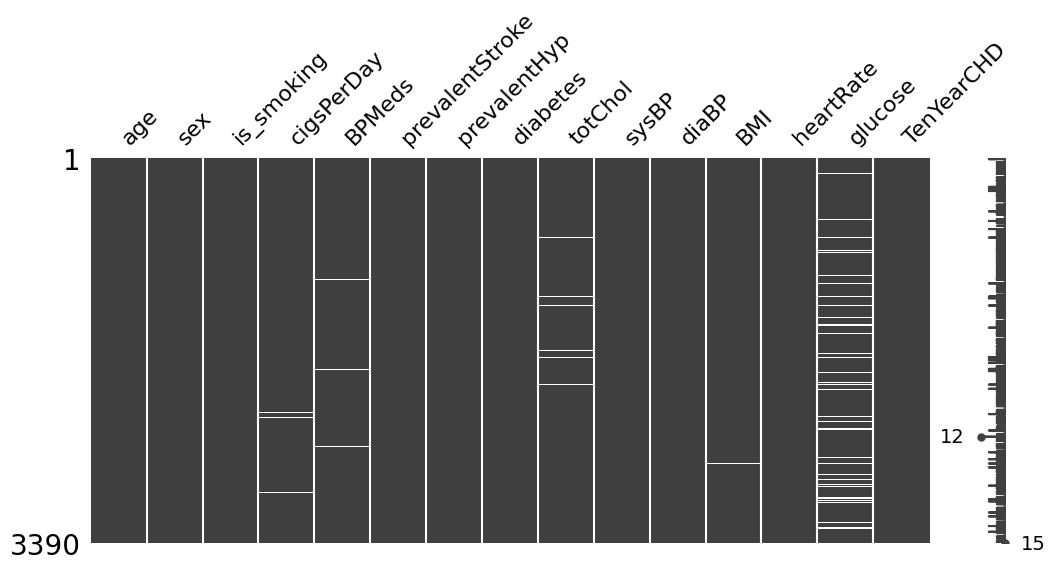

In [16]:
# visualize missing values by using missingno library
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df,figsize=(12, 5))

<Axes: >

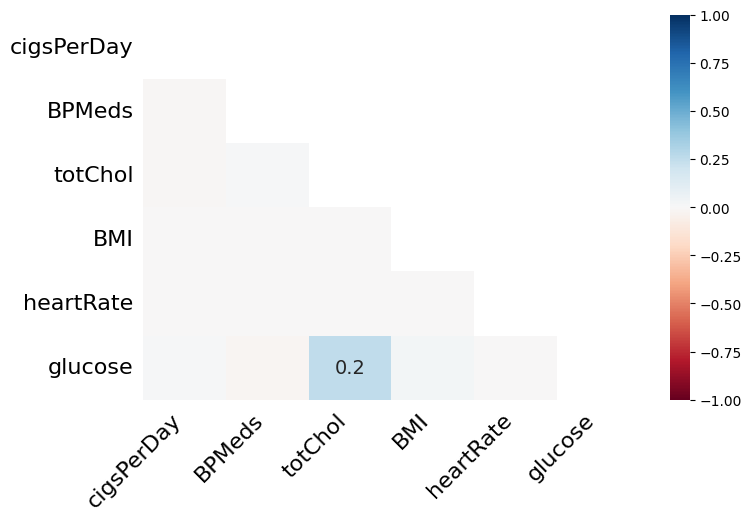

In [17]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(df,figsize=(8, 5))

# % of Missing data in each feature

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missingdf = missing[missing['Total']>0]
print(missingdf)

            Total  Percentage
glucose       304    8.967552
BPMeds         44    1.297935
totChol        38    1.120944
cigsPerDay     22    0.648968
BMI            14    0.412979
heartRate       1    0.029499


# Visualize the % of Missing data in each feature

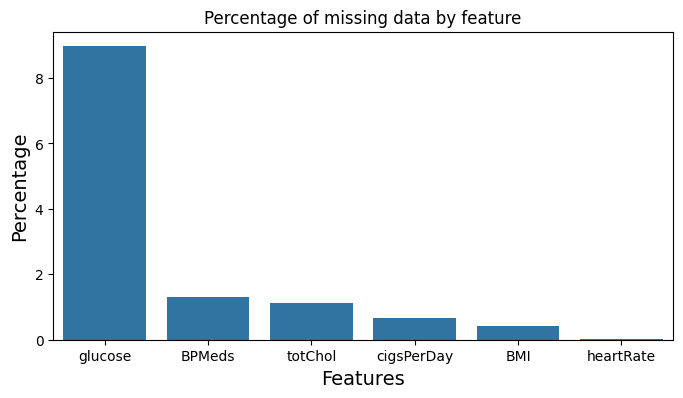

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x=missingdf.index, y=missingdf['Percentage'], data = missingdf)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

# Let's Count the rows which have missing data and get % out of it

In [20]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage 
print("% of rows which have missing data: ",round((count/len(df.index))*100), "%")

Total number of rows with missing values is  386
% of rows which have missing data:  11 %


> we can drop the missing data

In [21]:
df.dropna(axis=0,inplace=True)

# checking if there are any missing values left
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

> Checking for Any duplicates

In [22]:
len(df[df.duplicated()])

0

> Statistics of dataset after pre-processing

In [23]:
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,49.521305,0.448402,0.492676,9.078562,0.030293,0.005992,0.314913,0.027297,237.222370,132.591711,82.923103,25.824041,75.816911,81.993009,0.152130
std,8.595076,0.497413,0.500030,11.890855,0.171421,0.077189,0.464559,0.162974,45.267516,22.270882,12.038348,4.121130,11.937110,24.125814,0.359207
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.057500,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.072500,83.000000,87.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Visualizing Data Distribution

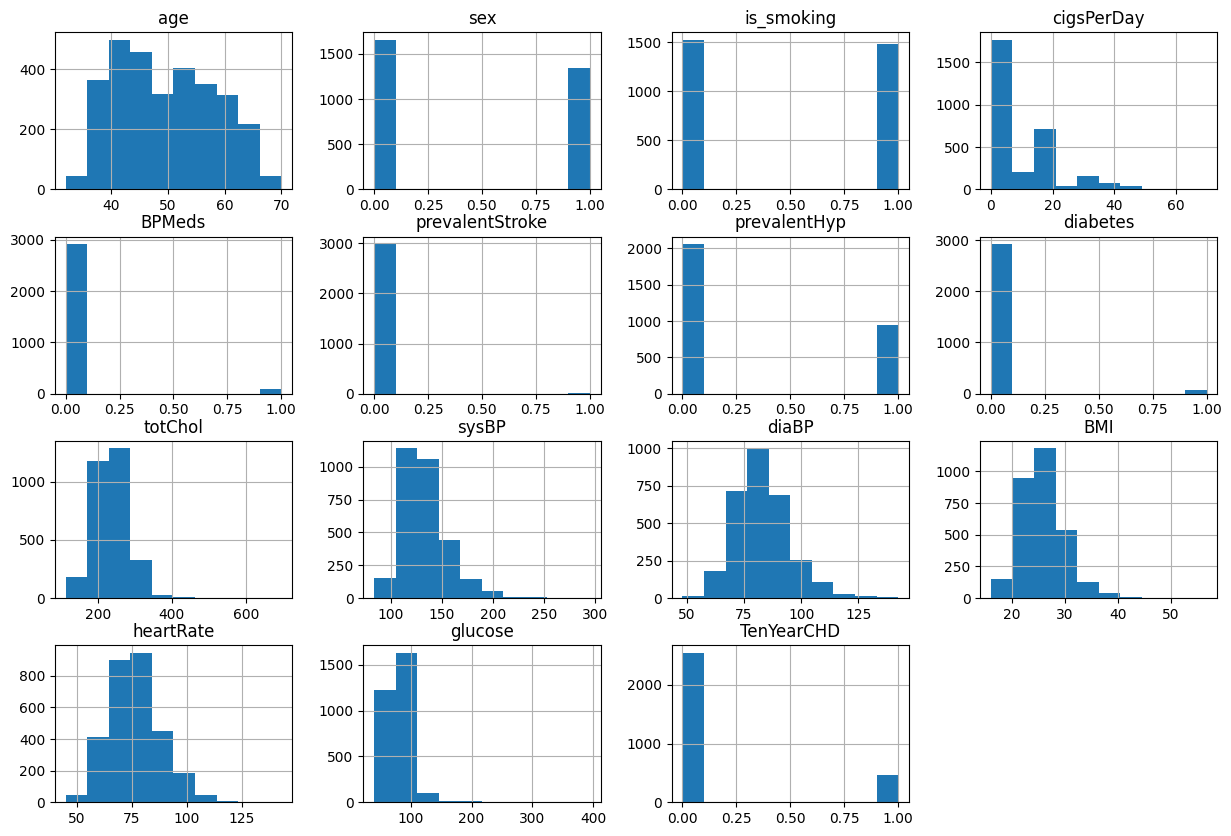

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

> Plotting pie chart for TenYearCHD

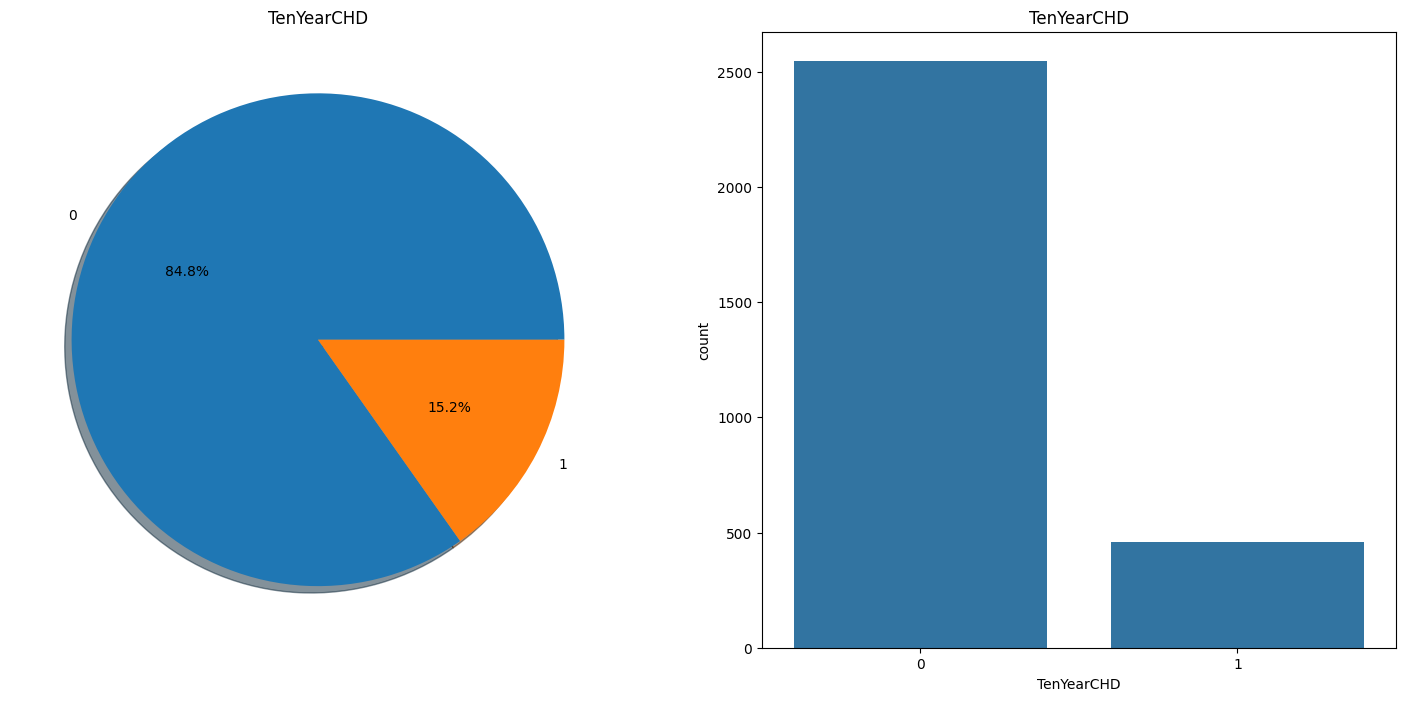

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot(x='TenYearCHD', data=df, ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

> Let's Visualize the target and age variable

<Axes: title={'center': 'No. of people with and without cardiovascular disease'}, xlabel='age', ylabel='count'>

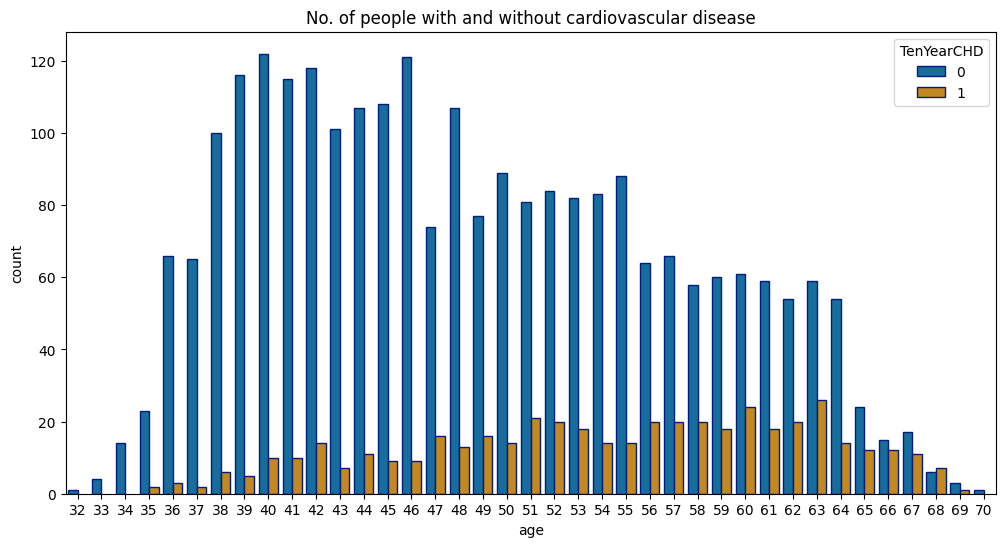

In [26]:
plt.figure(figsize=(12, 6))
plt.title('No. of people with and without cardiovascular disease')
sns.countplot(x='age',hue= 'TenYearCHD' ,data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1)[0])

* People with `Highest risk` of developing heart disease are between `51 - 63`

# Categorical Variable Comparisions with Target Variable - `TenYearCHD`

We will use **Stacked Bar Chart**

In [27]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#006400', '#FF0000', '#228B22']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    #Plot
    barWidth = 0.85
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5 , data_label, ha='center', va='bottom', fontdict=dict(color='black', size=20))

    for item in ([ax.title]):
        item.set_fontsize(27)
    
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)

    legend = ax.legend(plots, bars.columns.tolist(), ncol=2, fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

> Let's Visualize each category with respect to Target Vsriable - TenYearCHD

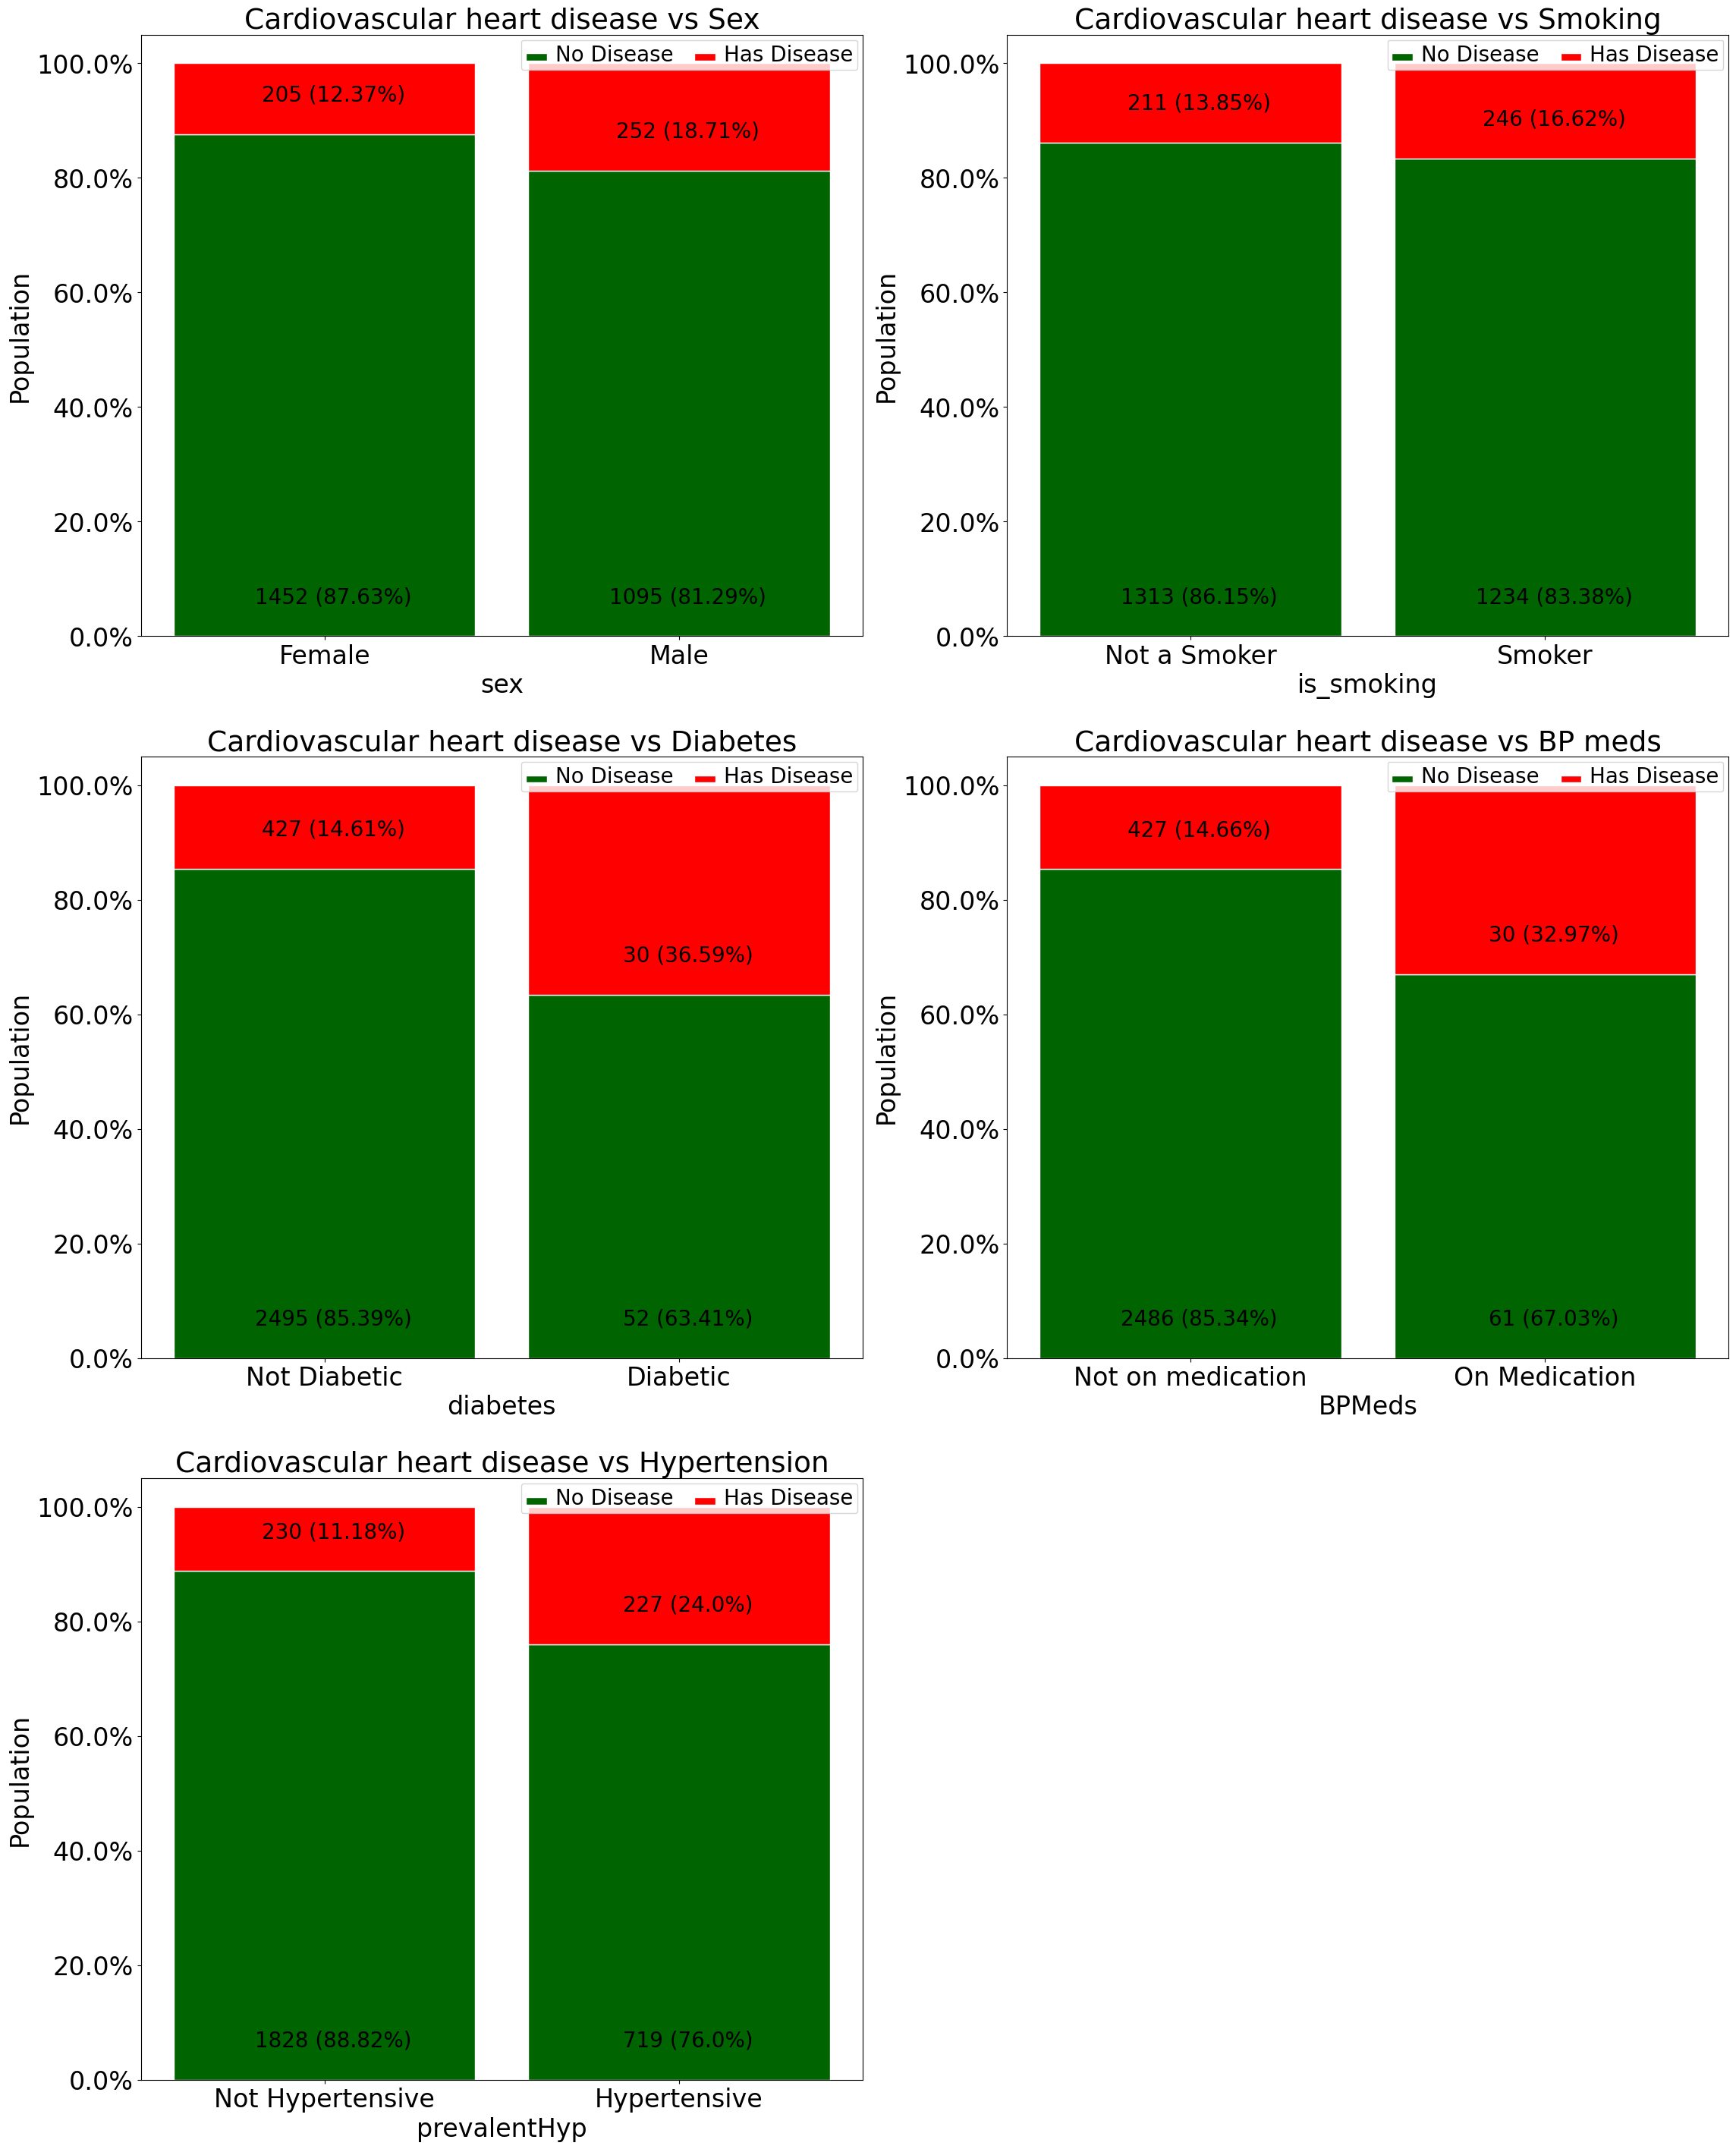

In [28]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(27, 35)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

From the above categorical variables comparison plot we can conclude that,

*   Slightly more males are suffering from Cardiovascular heart disease than females.
*   The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
*   The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
*   The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.

# Let's see the Correlation between the all features using heatmap

Text(0.5, 1.0, 'Correlation between the all features')

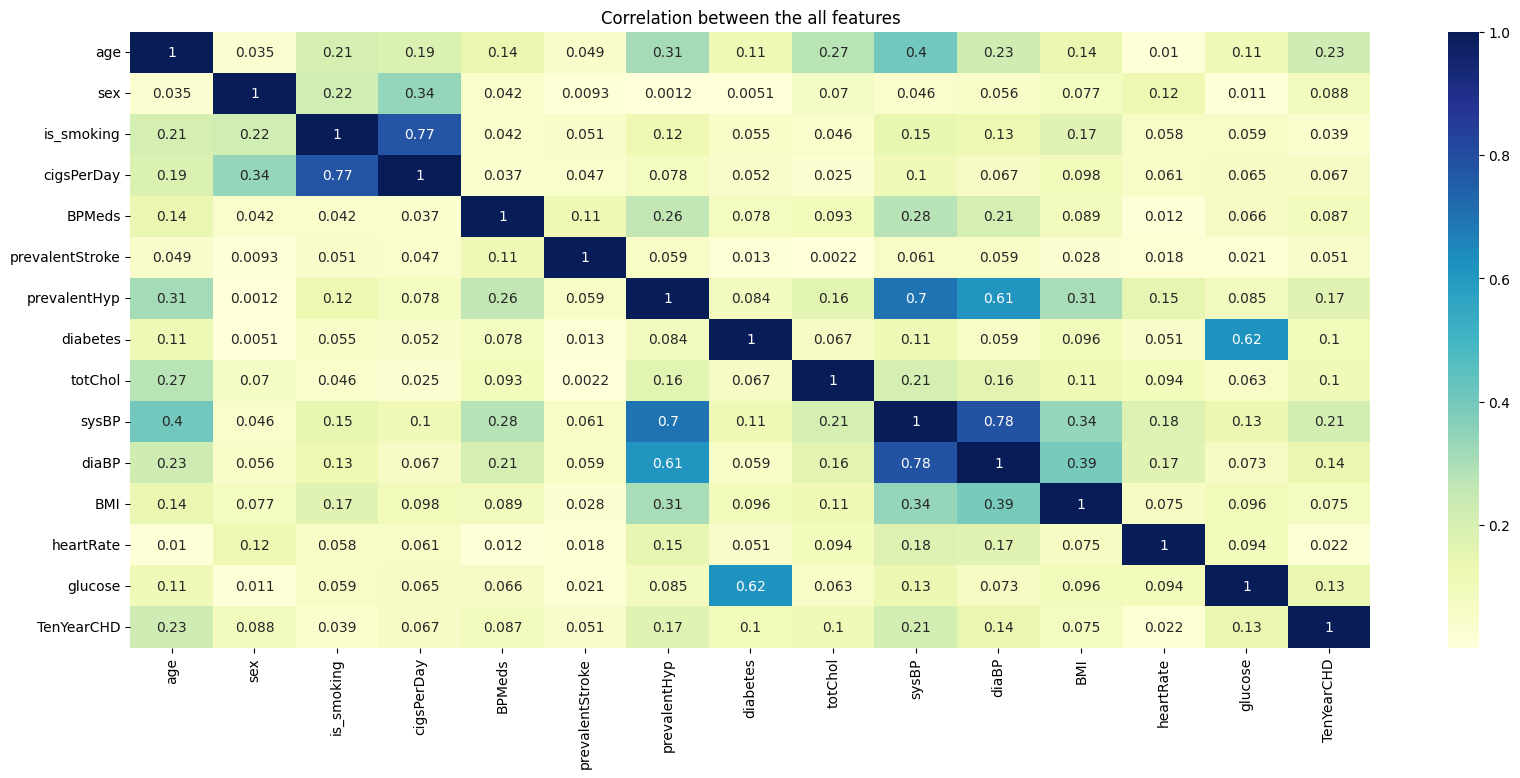

In [29]:
plt.figure(figsize=(20,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')
plt.title('Correlation between the all features')

**From the above correlation plot we can conclude that**,

*   There are no features with more than 0.2 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model. 

**These includes:** 

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day. 

Therefore we need to carry out feature selection to pick the best features. 

# Feature Selection

**Tree-based: SelectFromModel**

**SelectFromModel** is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.

Here,

We have used RandomForest() to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree. 

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [30]:
# Define the features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(x, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [32]:
# Important or Top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

> Statistics on Top features

In [33]:
import statsmodels.api as sm

# Splitting the dependent and independent vatriables
top_features = df[embeded_rf_feature]
y = df['TenYearCHD']

result = sm.Logit(y, top_features).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2997
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                 0.02592
Time:                        15:00:08   Log-Likelihood:                -1247.7
converged:                       True   LL-Null:                       -1280.9
Covariance Type:            nonrobust   LLR p-value:                 2.236e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0226      0.006      3.584      0.000       0.010       0.035
totChol       -0.0018      0.

> Checking the `odds radio` of `top features`

In [34]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.010284  1.035552    1.022840
totChol    0.995854  1.000481    0.998165
sysBP      1.017473  1.032083    1.024752
diaBP      0.958523  0.983091    0.970729
BMI        0.922652  0.972119    0.947062
heartRate  0.962550  0.978167    0.970327
glucose    1.001974  1.009041    1.005501


> Getting `Cardiovacular Heart disease` risk increases with about `2%` for every increase in `age` and `sysBP`

# Pair Plots

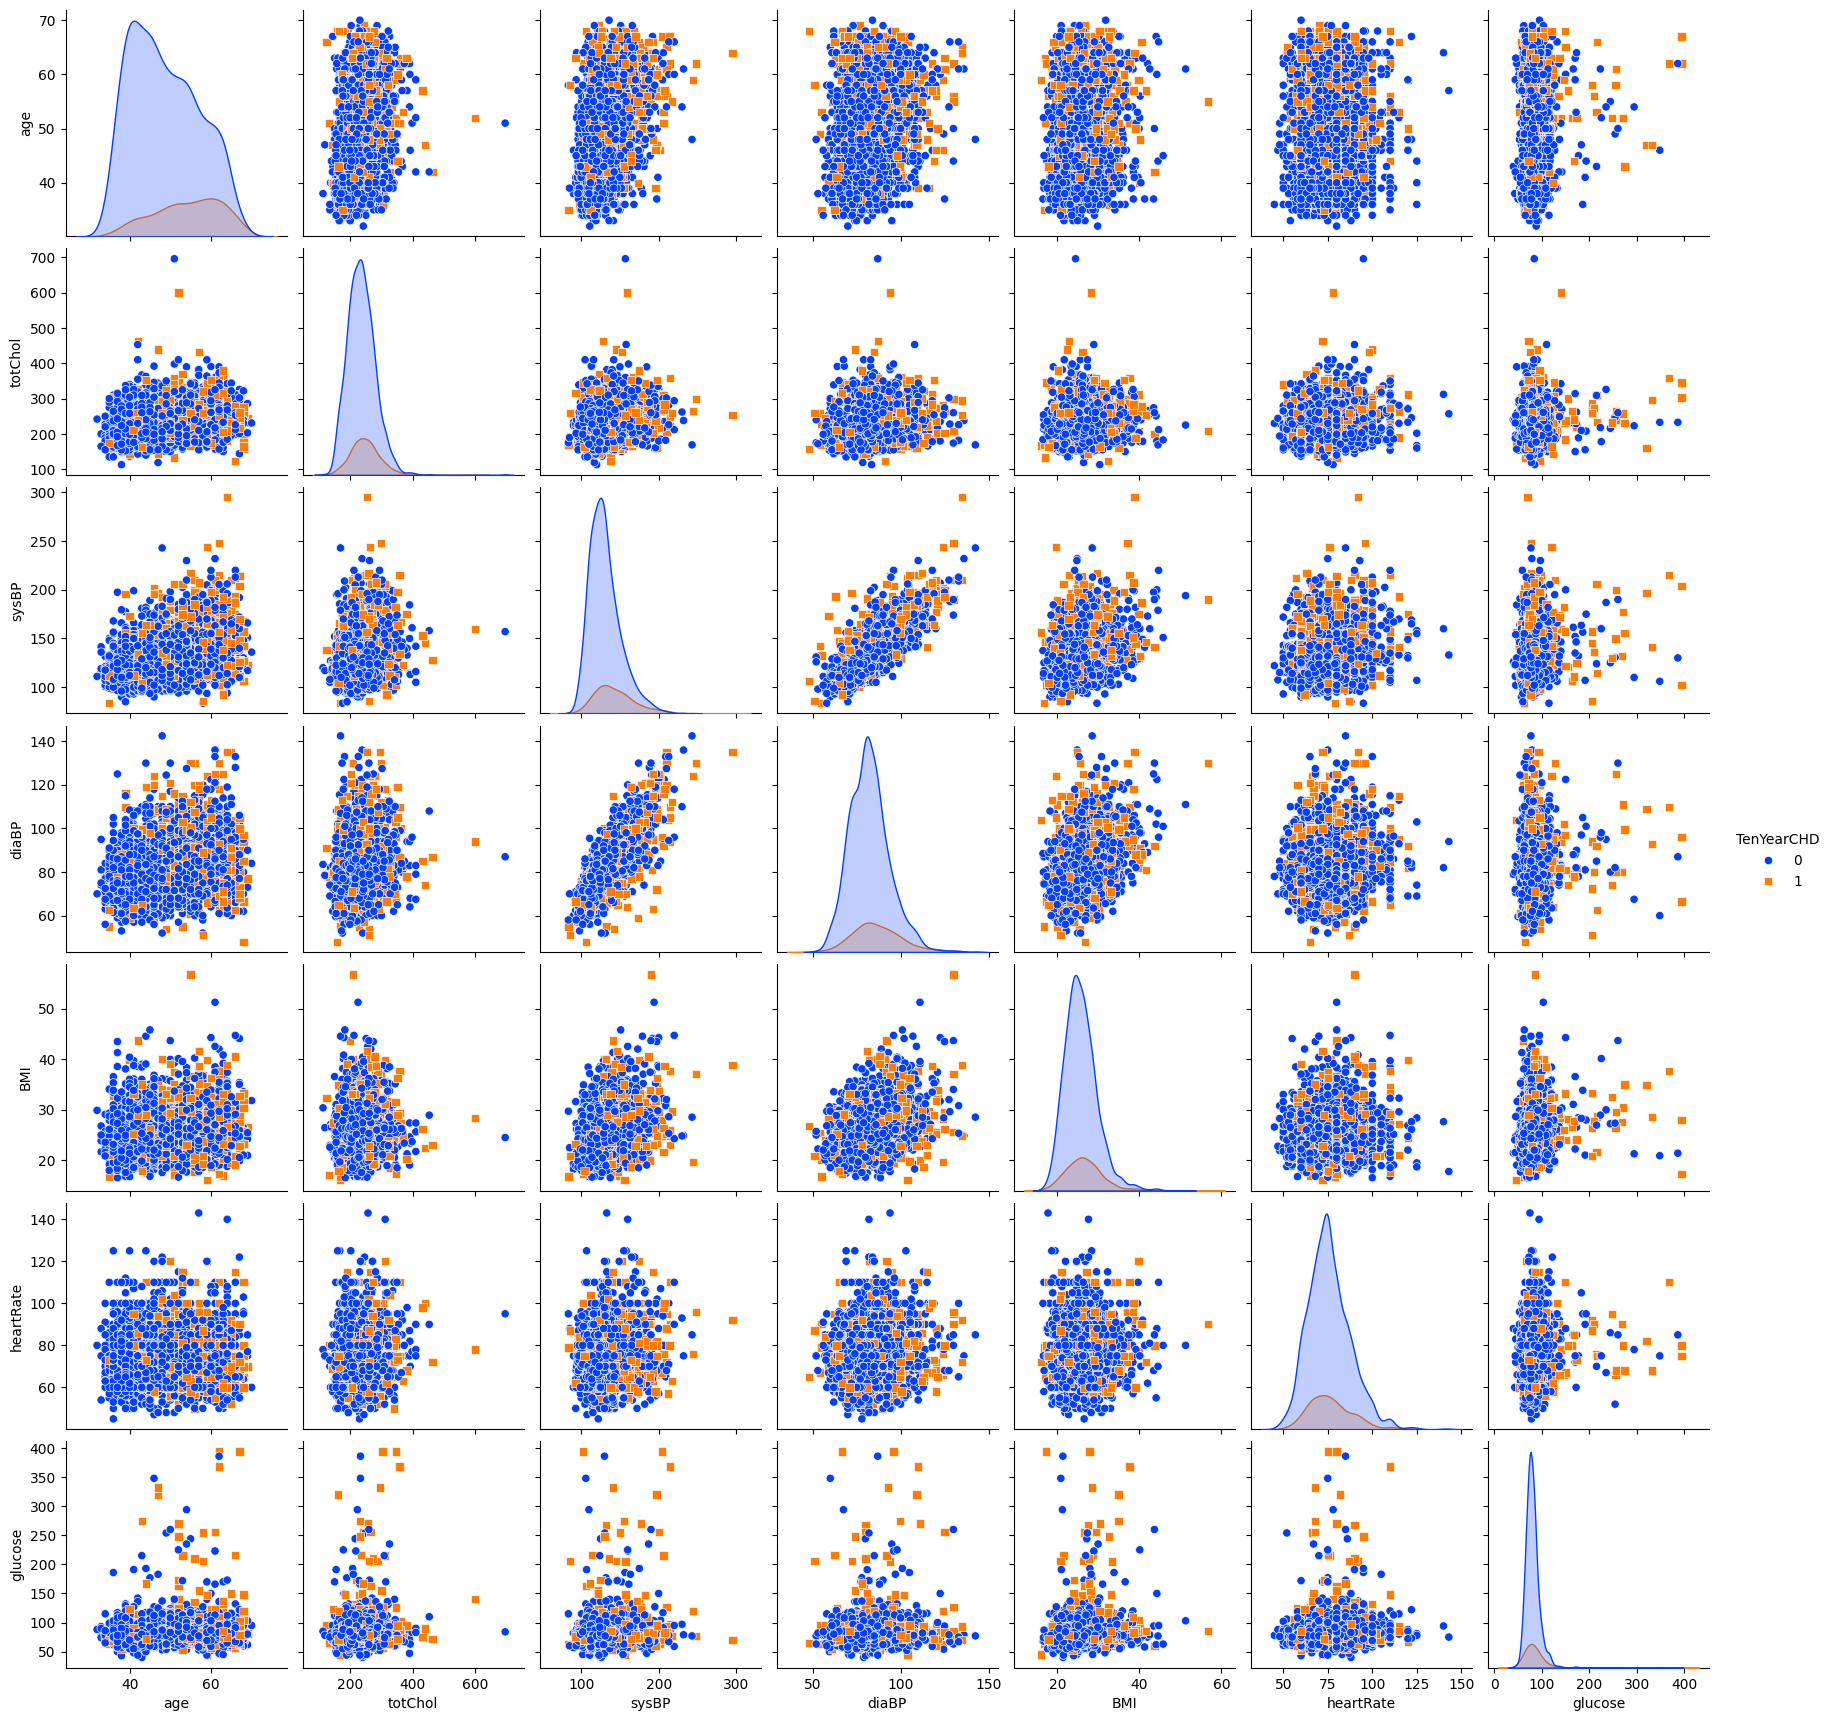

In [35]:
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright')

# Modelling and Predicting with ML models

**SMOTE** algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[embeded_rf_feature]
y = df.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3004
Resampled dataset shape 5094


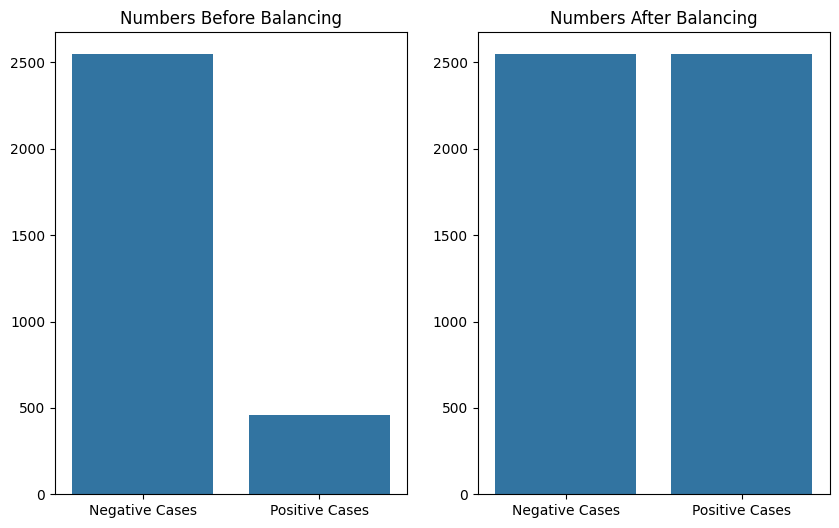

In [37]:
from collections import Counter
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(dict(Counter(y)).values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels,y= list(dict(Counter(y_smote)).values()))
plt.title("Numbers After Balancing")
plt.show()

# Splitting the data to Training and Testing sets


In [38]:
# first create our new dataset

df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,272.0,182.0,121.0,32.80,85.0,65.0,1


In [39]:
x_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4075 records and Testing features have 1019 records.


# Models:

1. Logistic Regression
2. Random Forest
3. XGBoost
4. Support Vector Machine

In [40]:
# importing Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# 1. Logistic Regression

> Using gridsearch for optimum parameters

In [41]:
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

> Training the classifier

In [42]:
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

> Making Predictions

In [43]:
logistic_predict = logistic_clf.predict(X_test)
logistic_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.05%


In [44]:
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6547239263803681
Test ROC-AUC score :  0.6604514229636899


> Consfusion Matrix for `Logistic Model`

<Axes: >

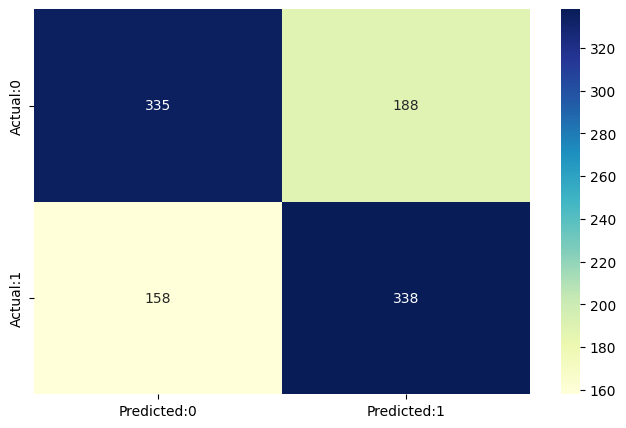

In [45]:
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       523
           1       0.64      0.68      0.66       496

    accuracy                           0.66      1019
   macro avg       0.66      0.66      0.66      1019
weighted avg       0.66      0.66      0.66      1019



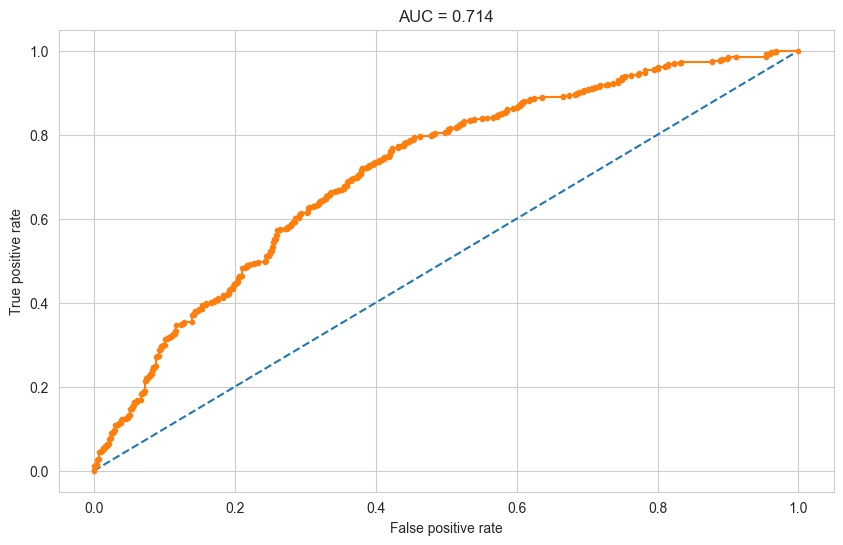

In [47]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# 2. Random Forest Classifier

> Using gridsearch for Optimum Parameters

In [48]:
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

> Training the classifiers

In [49]:
random_clf.fit(X_train,Y_train)

random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

> Making Predictions

In [50]:

random_predict = random_clf.predict(X_test)

In [51]:
random_accuracy = accuracy_score(Y_test,random_predict)
print(f"Using Random Forest we get an accuracy of {round(random_accuracy*100,2)}%")

Using Random Forest we get an accuracy of 70.76%


> Confusion Matrix for `Random Forest Classifier`

<Axes: >

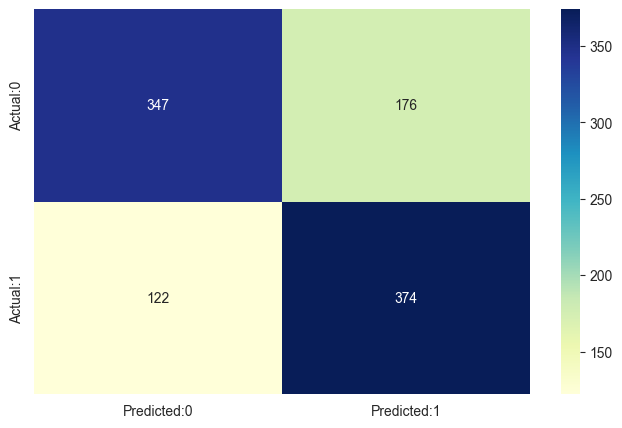

In [52]:
cm=confusion_matrix(Y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [53]:
print(classification_report(Y_test,random_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       523
           1       0.68      0.75      0.72       496

    accuracy                           0.71      1019
   macro avg       0.71      0.71      0.71      1019
weighted avg       0.71      0.71      0.71      1019



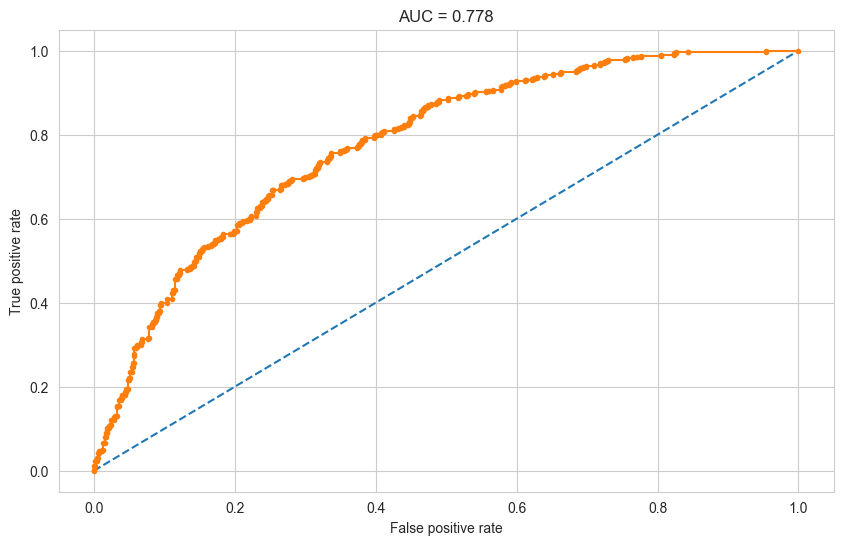

In [54]:
# ROC curve and AUC 
probs1 = random_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
ran_auc = roc_auc_score(Y_test, probs1)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(ran_auc,3)}")
plt.show()

# 3. XGBoost

> Using gridSearch for optimum Parameters

In [55]:
params_xgb = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')
                      

> Training the Classifier

In [56]:
xgb_clf.fit(X_train,Y_train)

xgb_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200}

> Making Predictions

In [57]:
xgb_predict = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(Y_test,xgb_predict)
print(f"Using XG boost we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG boost we get an accuracy of 89.4%


> Confusion Matrix for XG Boost Classifier

<Axes: >

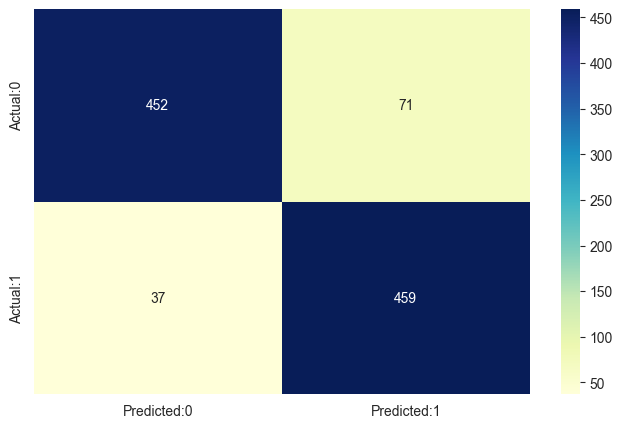

In [58]:
cm=confusion_matrix(Y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [59]:
print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       523
           1       0.87      0.93      0.89       496

    accuracy                           0.89      1019
   macro avg       0.90      0.89      0.89      1019
weighted avg       0.90      0.89      0.89      1019



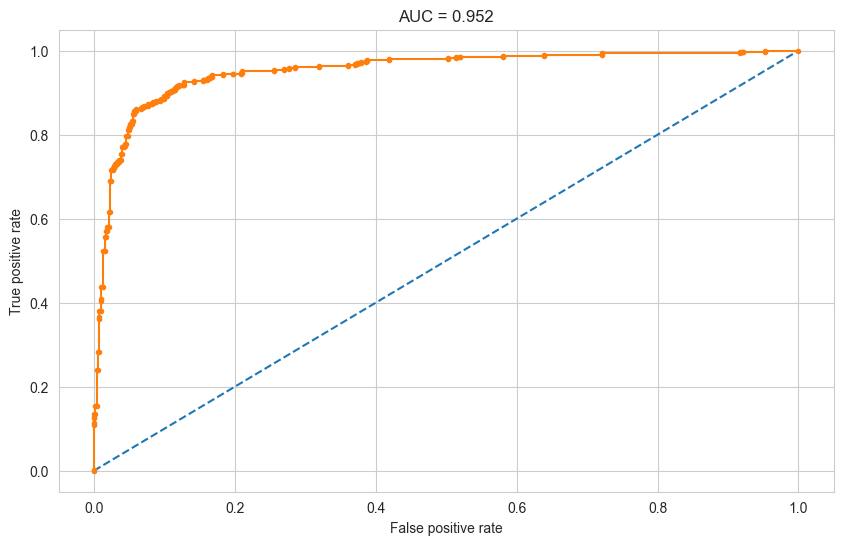

In [60]:
# ROC curve and AUC 
probs2 = xgb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
xgb_auc = roc_auc_score(Y_test, probs2)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs2)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_auc,3)}")
plt.show()

# 4. Support Vector Machine

> Using GridSearch for Optimum Parameters

In [61]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

> Training the classifier

In [62]:
svm_clf1 = svm_clf.fit(X_train,Y_train)

svm_clf.best_params_

{'C': 10, 'gamma': 0.01}

> Making Predictions

In [63]:
svm_predict = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using Support Vector Machine we get an accuracy of 93.33%


> Confusion Matrix

<Axes: >

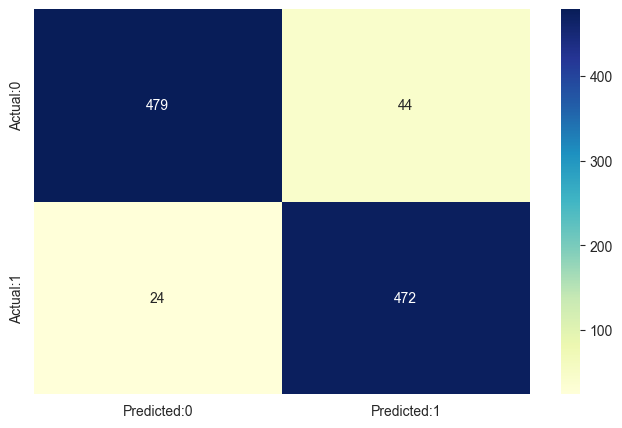

In [64]:
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [65]:
print(classification_report(Y_test, svm_predict))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       523
           1       0.91      0.95      0.93       496

    accuracy                           0.93      1019
   macro avg       0.93      0.93      0.93      1019
weighted avg       0.93      0.93      0.93      1019



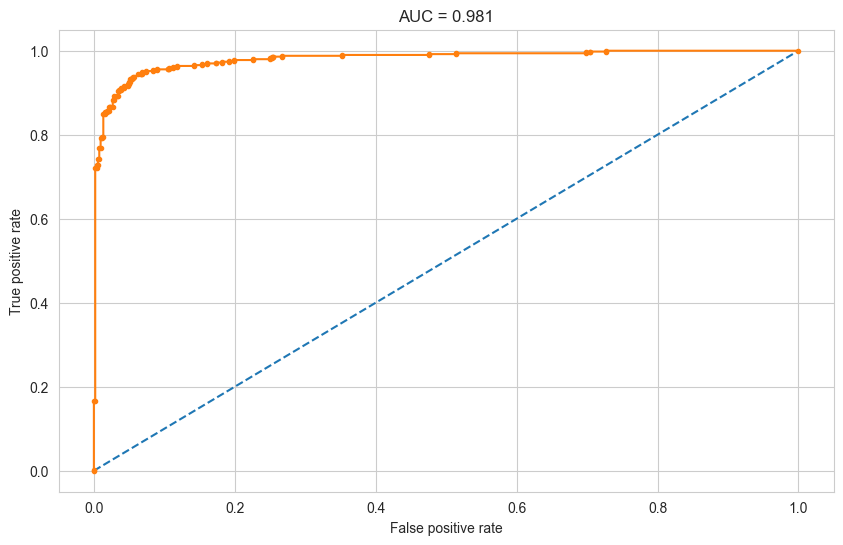

In [66]:
# ROC curve and AUC 
probs3 = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
svc_auc = roc_auc_score(Y_test, probs3)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs3)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()

# Comparing All the models

In [67]:
Performance_df = pd.DataFrame({
    "Logistic regression":{'Test Accuracy':round(logistic_accuracy, 2),'Precision': round(precision_score(Y_test, logistic_predict), 2),'Recall': round(recall_score(Y_test, logistic_predict), 2),'F1 Score': round(f1_score(Y_test, logistic_predict), 2), 'AUC':round(log_auc, 2)},
    "Random Forest":{'Test Accuracy':round(random_accuracy, 2),'Precision': round(precision_score(Y_test, random_predict), 2),'Recall': round(recall_score(Y_test, random_predict), 2),'F1 Score': round(f1_score(Y_test, random_predict), 2), 'AUC':round(ran_auc, 2)},
    "XG Boost":{'Test Accuracy':round(xgb_accuracy, 2),'Precision': round(precision_score(Y_test, xgb_predict), 2),'Recall': round(recall_score(Y_test, xgb_predict), 2),'F1 Score': round(f1_score(Y_test, xgb_predict), 2), 'AUC':round(xgb_auc, 2)},
    "Support vector machine":{'Test Accuracy':round(svm_accuracy, 2),'Precision': round(precision_score(Y_test, svm_predict), 2),'Recall': round(recall_score(Y_test, svm_predict), 2),'F1 Score': round(f1_score(Y_test, svm_predict), 2), 'AUC':round(svc_auc, 2)}
}).T
Performance_df

,Test Accuracy,Precision,Recall,F1 Score,AUC
Logistic regression,0.66,0.64,0.68,0.66,0.71
Random Forest,0.71,0.68,0.75,0.72,0.78
XG Boost,0.89,0.87,0.93,0.89,0.95
Support vector machine,0.93,0.91,0.95,0.93,0.98


> Since, **Support Vector Machine model** gives highest F score and AUC score. we will save this model to predict the disease

> Let's plot the accuracy and AUC score of each model

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

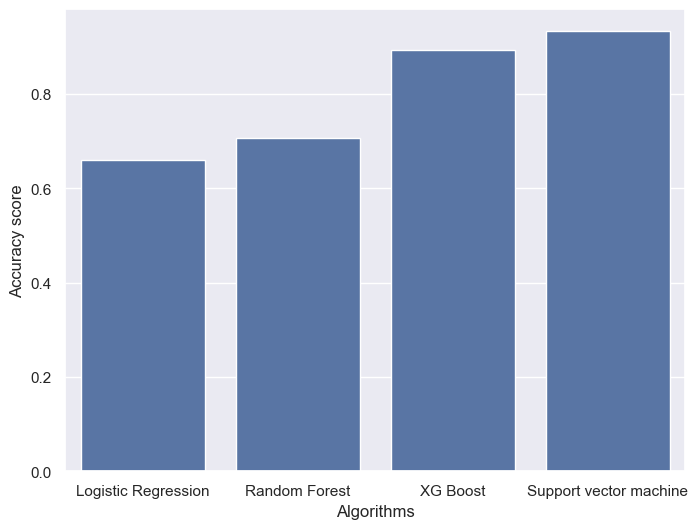

In [68]:
# Storing accuracies of each algorithm in a list
scores = [logistic_accuracy,random_accuracy,xgb_accuracy,svm_accuracy]
# Naming the algorithms and storing in a list
algorithms = ["Logistic Regression","Random Forest","XG Boost","Support vector machine"] 
# Visualize the algorithms
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)

<Axes: xlabel='Algorithms', ylabel='AUC score'>

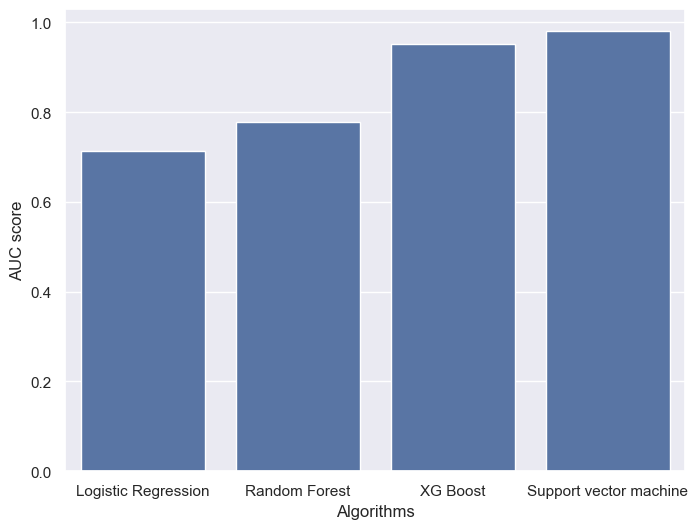

In [69]:
# Storing AUC score of each algorithm in a list
auc_scores = [log_auc,ran_auc,xgb_auc,svc_auc]
# Naming the algorithms and storing in a list
algorithms = ["Logistic Regression","Random Forest","XG Boost","Support vector machine"] 
# Visualize the algorithms
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("AUC score")
sns.barplot(x=algorithms,y=auc_scores)

> From both the graphs we can say that the best performing model is **Support Vector Machine** algorithm.

# **Conclusion:**
* The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
* The top features in predicting the ten year risk of developing Cardiovasular Heart Disease are **'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'**.
* The Support vector machine with the radial kernel is the best performing model in terms of accuracy and the F1 score and Its high AUC-score shows that it has a high true positive rate.
* Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity.
* With more data(especially that of the minority class) better models can be built.

> Let us save the `Support Vector Machine` model to use it furthur

In [70]:
import pickle
pickle.dump(svm_clf1,open('model.pkl','wb'))